In [ ]:
!pip install langgraph

In [ ]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal
import random

In [ ]:
class JourneyState(TypedDict):
    current_location: str

In [ ]:
def coimbatore(state: JourneyState) -> JourneyState:
  print("📍 Starting journey from Coimbatore")
  return {"current_location": "Departed from Coimbatore"}

In [ ]:
def trichy(state: JourneyState) -> JourneyState:
    print("🚗 Arrived at Trichy")
    return {"current_location": "Visited Trichy"}

def salem(state: JourneyState) -> JourneyState:
    print("🚗 Arrived at Salem")
    return {"current_location": "Visited Salem"}

In [ ]:
def decide_intermediate_city(state: JourneyState) -> Literal["trichy", "salem"]:
    print(f"🗺️  Deciding route... Last update: {state['current_location']}")
    if random.random() < 0.5:
        print("--> Route selected: Trichy")
        return "trichy"
    else:
        print("--> Route selected: Salem")
        return "salem"

In [ ]:
builder = StateGraph(JourneyState)

In [ ]:
builder.add_node("coimbatore", coimbatore)
builder.add_node("trichy", trichy)
builder.add_node("salem", salem)

In [ ]:
builder.add_edge(START, "coimbatore")

In [ ]:
builder.add_conditional_edges("coimbatore", decide_intermediate_city)

In [ ]:
builder.add_edge("trichy", END)
builder.add_edge("salem", END)

In [ ]:
graph = builder.compile()

In [ ]:
from IPython.display import Image, display

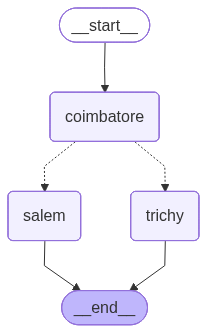

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"current_location" : "Coimbatore"})

📍 Starting journey from Coimbatore
🗺️  Deciding route... Last update: Departed from Coimbatore
--> Route selected: Salem
🚗 Arrived at Salem


{'current_location': 'Visited Salem'}